INTRODUCTION

In [2062]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1963]:
#create a function to load the data
def load_data(url):
    cars = pd.read_csv(url)
    return cars

In [1964]:
cars = load_data('used_cars_data.csv')

In [1965]:
cars.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,10.25,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21.00,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,7.63,1.95


In [1966]:
#create a function to do exploratory data analysis
def EDA(df):
    info = df.info()
    shape = df.shape
    columns = df.columns
    missing = df.isna().sum()
    return info,shape,columns,missing

In [1967]:
#call the function
EDA(cars)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


(None,
 (7253, 14),
 Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
        'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
        'New_Price', 'Price'],
       dtype='object'),
 S.No.                   0
 Name                    0
 Location                0
 Year                    0
 Kilometers_Driven       0
 Fuel_Type               0
 Transmission            0
 Owner_Type              0
 Mileage                 2
 Engine                 46
 Power                 175
 Seats                  53
 New_Price               0
 Price                1234
 dtype: int64)

### Analysing with Pandas Profiling

Now we would use pandas profiling as an exploratory data analysis tool to help get early insights from the data

In [1968]:
# !pip install pandas-profiling
# from pandas_profiling import ProfileReport

In [1969]:
# #use pandas profiling to get early insights from the data before cleaning
# prof=ProfileReport(cars)
# prof.to_file("cars.html")

The dataset contains 7253 rows and 14 variables. The variables include 3 integer data  types, 3 float types and 8 string objects. The data also has some missing values, the mileage, engine, power, , seats and price columns have 2,46,175,53, and 1234 missing values respectively

### Data Cleaning 

let us try and visualise the missing values

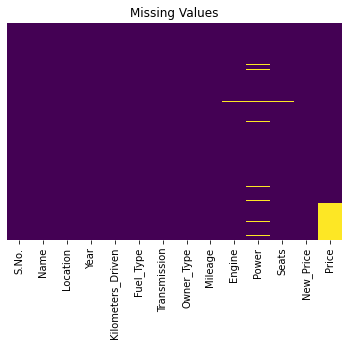

In [1970]:
# missing values
sns.heatmap(cars.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Values');

There are missing values in the dataset as I could vizualise with a heatmap. The yellow lines covers the variables that have missing values

Then next we check for the unique values in the dataframe

### Checking For Unique Values in the Dataframe


In [1971]:
print('Name', cars['Name'].unique(),  '\n' + '\n',
'Location', cars['Location'].unique(),  '\n' + '\n',
'Year', cars['Year'].unique(),  '\n' + '\n',
'Kilometers_Driven', cars['Kilometers_Driven'].unique(),  '\n' + '\n',
'Fuel_Type', cars['Fuel_Type'].unique(),  '\n' + '\n',
'Transmission', cars['Transmission'].unique(),  '\n' + '\n',
'Owner_Type', cars['Owner_Type'].unique(),  '\n' + '\n',
'Mileage', cars['Mileage'].unique(),  '\n' + '\n',
'Engine', cars['Engine'].unique(),  '\n' + '\n',
'Power', cars['Power'].unique(),  '\n' + '\n',
'Seats', cars['Seats'].unique(),  '\n' + '\n',
'New_Price', cars['New_Price'].unique(),  '\n' + '\n',
'Price', cars['Price'].unique())

    


Name ['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus'] 

 Location ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad'] 

 Year [2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998 1996] 

 Kilometers_Driven [72000 41000 46000 ... 89411 52262 72443] 

 Fuel_Type ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric'] 

 Transmission ['Manual' 'Automatic'] 

 Owner_Type ['First' 'Second' 'Fourth & Above' 'Third'] 

 Mileage ['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' '13.5 kmpl'
 '25.8 kmpl' '28.4 kmpl' '20.45 kmpl' '14.84 kmpl' '22.69 kmpl'
 '23.65 kmpl' '13.53 kmpl' '18.5 kmpl' '14.4 kmpl' '20.92 kmpl'
 '17.5 kmpl'

The mileage column contains two units, some are in kmpl, while others have km/kg. We have to convert all to a single unit



Before we fix this let us first do some feature engineering by splitting the name column to car_brand and model columns

In [1972]:
cars[['Car_Brand','Model']] = cars.Name.str.split(n=1,expand=True) #splitting the Brand and the car model

Model names are unique to the Car Brands, so let us check for the unique values

In [1973]:
#check the unique brands 
Brand_name=cars['Car_Brand'].unique()
Model=cars['Model'].unique() 

Brand_name


array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

We see that Land Rover is mentioned as Land and the Brand Isuzu is mentioned twice, one in capital letters. So we have to fix this

In [1974]:
#correcting the brands
cars['Car_Brand']=cars['Car_Brand'].replace('Land','Land_Rover') 
cars['Car_Brand']=cars['Car_Brand'].replace('ISUZU','Isuzu')  
cars['Car_Brand'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land_Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Car_Brand, dtype: int64

Observations:

Maruti and Hyundai are the most popular car brands

Honda and Toyota are the next most popular brands

In [1975]:
#create a fucntion to drop unwanted columns
def df_drop(data,columns):
    data.drop(columns,axis = 1,inplace = True)
    

In [1976]:
#calling the function
for columns in ['S.No.', 'Name']:
    df_drop(cars,columns)#applying above function to the column list

We had to drop the name and serial no. columns as they dont have any role to play

In [1977]:
#checking
cars.sample(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Brand,Model
1087,Kolkata,2015,120000,Petrol,Manual,First,18.6 kmpl,1199 CC,76.8 bhp,5.0,11.30,2.50,Chevrolet,Beat LS
465,Kolkata,2017,14000,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,5.0,7.45,4.60,Hyundai,Grand i10 CRDi Magna
2982,Coimbatore,2018,32807,Petrol,Automatic,First,13.0 kmpl,1591 CC,121.3 bhp,5.0,16.06,14.76,Hyundai,Creta 1.6 SX Plus Petrol Automatic
1902,Ahmedabad,2017,15000,Diesel,Automatic,First,12.9 kmpl,2755 CC,174.5 bhp,7.0,34.45,30.00,Toyota,Fortuner 2.8 2WD AT
6752,Mumbai,2017,29500,Diesel,Manual,First,23.65 kmpl,1248 CC,88.5 bhp,5.0,7.88,NaN,Maruti,SX4 S Cross DDiS 200 Zeta


#### Fixing the Mileage units

In [1978]:
#check number of rows with each unit
kmkg = 0
kmpl = 0
for i in cars.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with Kmpl : {} '.format(kmpl))

The number of rows with Km/Kg : 74 
The number of rows with Kmpl : 7177 


There are 74 rows with unit as km/kg and 7177 rows as kmpl

Converting kmkg to kmpl

1 liter of mileage = 0.737kg(https://coolconversion.com/density-volume-mass/--1--liter--of--petrol--in--kg)


Then 1kg = 1.4litres

Writing a function that will help split the string from the numerical values in the columns

This function will also drop the string and convert to float datatype.

The function would also convert missing values to np.nan

Also this function would convert km/kg to kmpl

In [1979]:
# This function converts CNG mileage values to kmpl, removes units, and casts to float
def con_mileage(mileage):
    if isinstance(mileage, str):
        if mileage.endswith('g'):
            con = 1.4
            return float(mileage.replace('km/kg', '').strip()) * con
        else:
            con = 1
            return float(mileage.replace('kmpl', '').strip()) * con
    else:
        return np.nan

cars['Mileage'] = cars['Mileage'].apply(con_mileage)

In [1980]:
#This function removes 'CC' units from Engine variable and casts as float
def eng_clean(engine):
    if isinstance(engine, str):
        return float(engine.replace('CC', '').strip())
    else:
        return np.nan
cars['Engine'] = cars['Engine'].apply(eng_clean)

In [1981]:
#This function removes 'bhp' units from Power variable and casts to float
def pow_clean(power):
    if isinstance(power, str):
        if power.replace('bhp', '').strip() != 'null':
            return float(power.replace('bhp', '').strip())
        elif power.replace('bhp', '').strip() == 'null':
            return np.nan
    else:
        return np.nan
cars['Power'] = cars['Power'].apply(pow_clean)

In [1982]:
cars[cars.Mileage.isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Brand,Model
4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,Mahindra,E Verito D4
4904,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,24.01,12.75,Toyota,Prius 2009-2016 Z4


In [1983]:
#checking
cars.sample(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Brand,Model
6083,Mumbai,2018,7000,Petrol,Manual,First,23.00,998.0,67.0,5.0,5.78,NaN,Maruti,Celerio X VXI Option
1751,Chennai,2006,110000,Petrol,Manual,First,13.50,1799.0,130.0,5.0,13.58,2.65,Honda,Civic 2006-2010 1.8 S MT
5553,Pune,2012,116000,Diesel,Manual,First,10.50,2835.0,107.2,6.0,33.21,9.95,Mitsubishi,Pajero 2.8 SFX 7Str
1181,Ahmedabad,2013,119000,Diesel,Manual,First,12.99,2494.0,100.0,8.0,24.01,8.00,Toyota,Innova 2.5 VX (Diesel) 8 Seater BS IV
3364,Ahmedabad,2014,51000,Petrol,Manual,First,20.36,1197.0,78.9,5.0,10.25,3.75,Hyundai,i10 Magna


In [1984]:
#checking the data types
cars.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
Car_Brand             object
Model                 object
dtype: object

### Cleaning the NAN Values

In [1985]:
#function to clean the NANs
def clean_data(data):
    data['Engine']=data['Engine'].fillna(data['Engine'].mean())
    data['Power']=data['Power'].fillna(data['Power'].mean())
    data['Seats']=data['Seats'].fillna(data['Seats'].mean())
    data['Mileage']=data['Mileage'].fillna(data['Mileage'].mean())
    data['Price']=data['Price'].fillna(data['Price'].mean())
    return data.isna().sum()

In [1986]:
clean_data(cars)

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Car_Brand            0
Model                0
dtype: int64

We cleaned the nan values in all the columns using the mean(average)

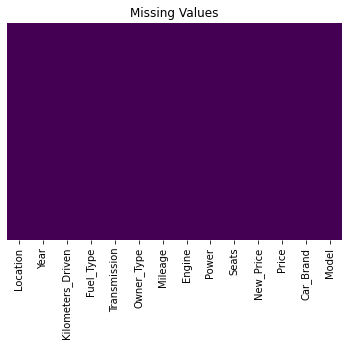

In [1987]:
#no missing values, we can also visualise this
sns.heatmap(cars.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Values');

In [1988]:
# #use pandas profiling to get early insights from the data after cleaning
# prof=ProfileReport(cars)
# prof.to_file("cars2.html")

### Finding Correlation Between the Features

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Year,1.000000,-0.187859,0.305722,-0.054233,0.012855,0.008137,-0.006277,0.279449
Kilometers_Driven,-0.187859,1.000000,-0.066177,0.094765,0.030074,0.090162,0.015501,-0.011318
Mileage,0.305722,-0.066177,1.000000,-0.571141,-0.492623,-0.297155,-0.395629,-0.275583
Engine,-0.054233,0.094765,-0.571141,1.000000,0.853067,0.399033,0.693063,0.604829
Power,0.012855,0.030074,-0.492623,0.853067,1.000000,0.094826,0.792914,0.704212
Seats,0.008137,0.090162,-0.297155,0.399033,0.094826,1.000000,0.037291,0.047318
New_Price,-0.006277,0.015501,-0.395629,0.693063,0.792914,0.037291,1.000000,0.697585
Price,0.279449,-0.011318,-0.275583,0.604829,0.704212,0.047318,0.697585,1.000000


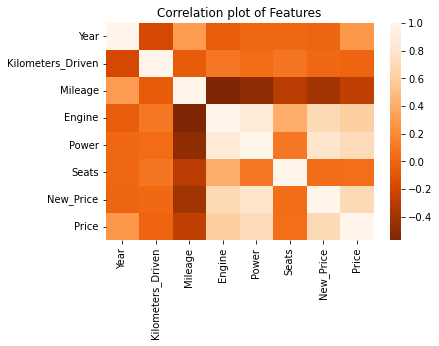

In [1989]:
corr=cars.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,cmap='Oranges_r')
plt.title('Correlation plot of Features')
corr 

#### Highly correlated Features

Engine vs Power : 0.853067

Power vs New price : 0.792914

Power vs Price : 0.704212

Engine vs Price : 0.604829

#### Highly Negatively Correlated

Mileage vs Engine  : -0.585023

## Visualizing the Data

### Changing String Data types to Categorical Data Types

In [1990]:
cars.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
Car_Brand             object
Model                 object
dtype: object

We have to change to categorical data types to aid visualizations

In [1991]:
cars['Model'] = cars['Model'].astype('category')
cars['Car_Brand'] = cars['Car_Brand'].astype('category')
cars['Location'] = cars['Location'].astype('category')
cars['Fuel_Type'] = cars['Fuel_Type'].astype('category')
cars['Transmission'] = cars['Transmission'].astype('category')
cars['Owner_Type'] = cars['Owner_Type'].astype('category')

In [1992]:
#checking
cars.dtypes

Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
New_Price             float64
Price                 float64
Car_Brand            category
Model                category
dtype: object

### Univariate Analysis

Here we explore distribution of individual variables to derive insights

In [1993]:
#function to build plots
def plot(data,var,color):
    sns.countplot(data=data,x=var,color=color)
    plt.title(f"Distibution of {var}")
    plt.xlabel(f"{var}")
    plt.ylabel("Count")
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22580\3572138202.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


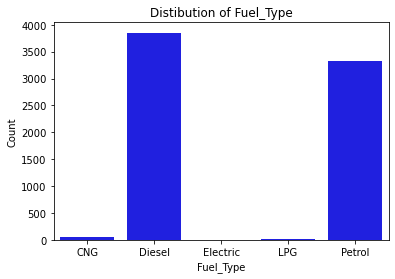

In [1994]:
fuel_type = plot(cars,'Fuel_Type',color='blue')

There are more cars that run on diesel , followed by PetrolT

C:\Users\User\AppData\Local\Temp\ipykernel_22580\3572138202.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


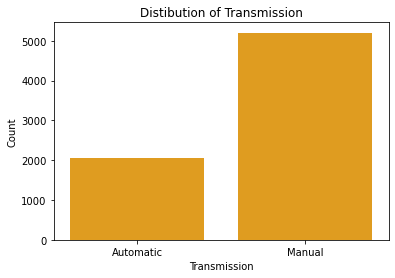

In [1995]:
transmission = plot(cars,'Transmission',color='orange')

There are more manual cars than automatic

C:\Users\User\AppData\Local\Temp\ipykernel_22580\3572138202.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


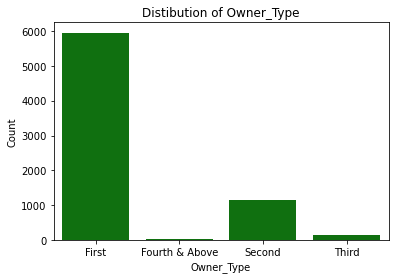

In [1996]:
owner_type = plot(cars,'Owner_Type',color='green')

There are more cars that are first owners than other level of ownership

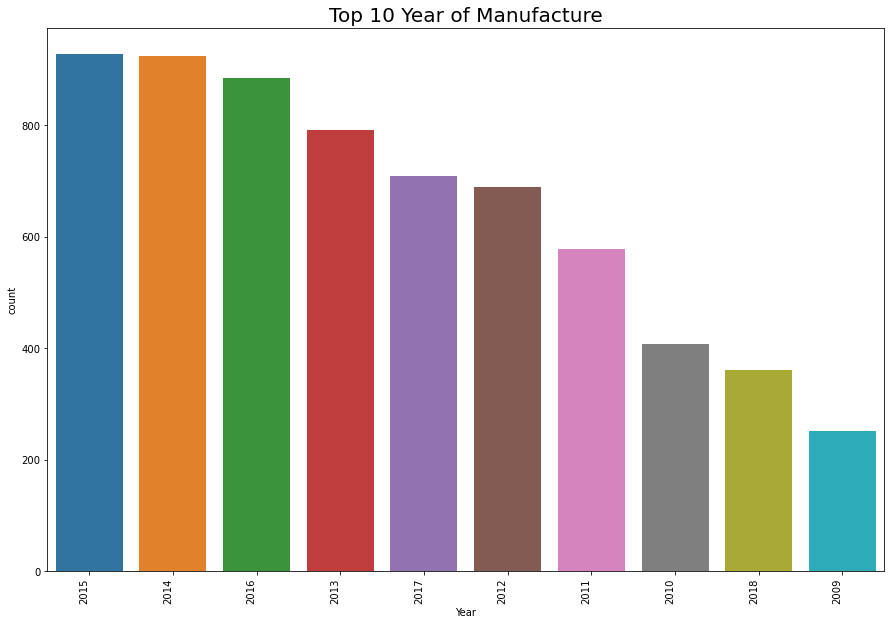

In [1997]:
#Top 10 years 
years_top10 = cars['Year'].value_counts().iloc[:10]
years = pd.DataFrame({'Year': years_top10.index, 'count': years_top10.values})
plt.figure(figsize=(15,10))
plt.title('Top 10 Year of Manufacture',size=20)
ax = sns.barplot(x='Year',y='count',data=years, order=years['Year']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10);

Cars that were manufactured in 2015 sold the highest, followed by year 2014

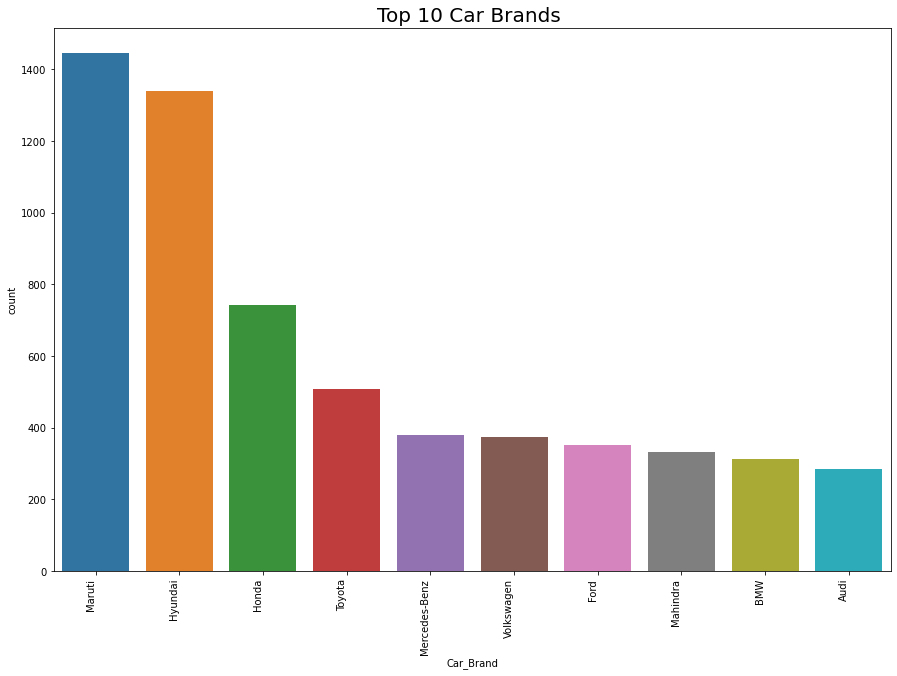

In [1998]:
#Top 10 Car brands 
car_top10 = cars['Car_Brand'].value_counts().iloc[:10]
car = pd.DataFrame({'Car_Brand': car_top10.index, 'count': car_top10.values})
plt.figure(figsize=(15,10))
plt.title('Top 10 Car Brands ', size=20)
ax = sns.barplot(x='Car_Brand',y='count',data=car, order=car['Car_Brand']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10);

Maruti had the highest price, followed by Hyundai

### Bivariate Analysis

Here we explore the relationship between individual variables and the target variable

In [1999]:
#function for scatter plot
def reg_plot(x,y,data,color):
    sns.regplot(x=x, y=y, data=data,color=color)
    plt.title('Regplot of {}'.format(x), size=20);

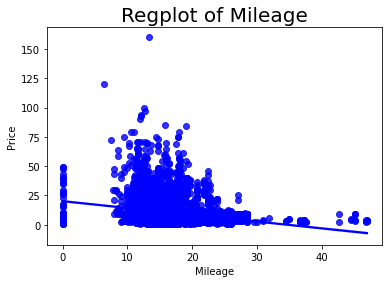

In [2000]:
reg_plot('Mileage','Price',cars,'blue')

Above graph shows that there is a negative linear relationship between price and mileage. So,these two features have negative Correlation. In other words the price reduces as the mileage increases

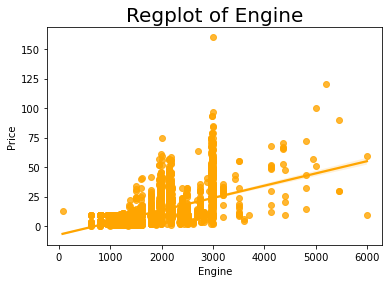

In [2001]:
reg_plot('Engine','Price',cars,'orange')

Above graph shows that there is a positive Linear relationship between engine and price .So , these two features have positive Correlation . So therefore, the size of the engine determines the price.

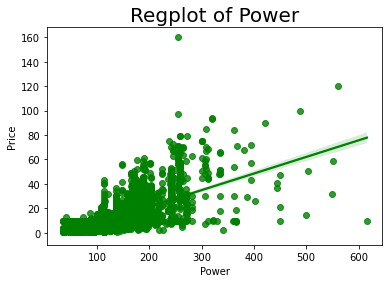

In [2002]:
reg_plot('Power','Price',cars,'green')

There is a positive Linear relationship between the power and price .So , these two features have positive Correlation . In other words, the higher the power, the higher the price.

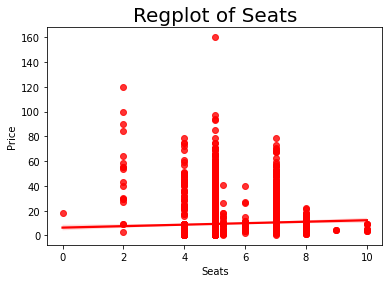

In [2003]:
reg_plot('Seats','Price',cars,'red')

Although there is a positive correlation between seats and price, seats does not directly influence the price of cars, other factors would have to be considered

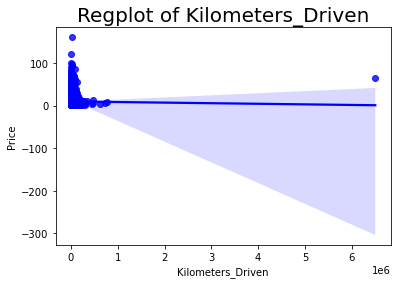

In [2004]:
reg_plot('Kilometers_Driven','Price',cars,'blue')

There is a negative correlation betwwen the kilometers driven and the price. The cars that are less driven has high price

In [2005]:
#function for subplots
def sub_plot(x,y,data,kind):
    var = data.groupby(x).Price.sum()
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel(x)
    ax1.set_ylabel(f'Increase In {y}')
    ax1.set_title(f"{x} Vs {y}")
    var.plot(kind=kind)

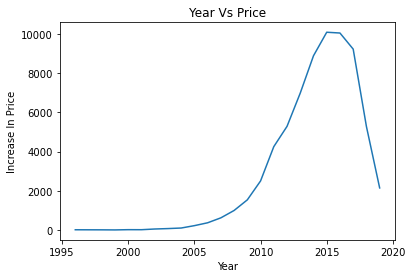

In [2006]:
#plot of years vs price
sub_plot(x='Year',y='Price',data=cars,kind='line')

Price of Cars registered between 2009 and 2016 went up the most, with 2015 being the peak

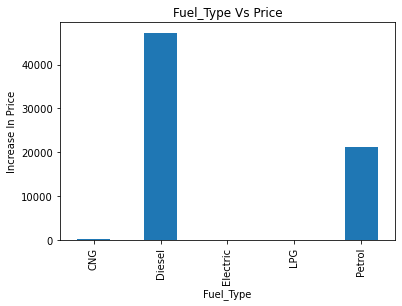

In [2007]:
#plot of fuel type vs price
sub_plot(x='Fuel_Type',y='Price',data=cars,kind='bar')

Diesel cars have the highest number of cars for sale and also has the highest price. followed by peterol cars

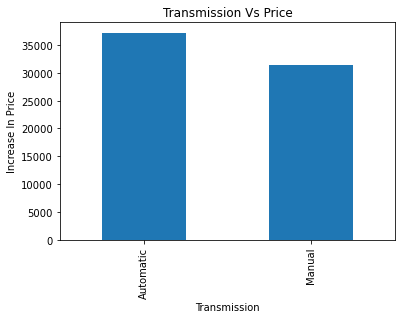

In [2008]:
#plot of transmission vs price
sub_plot(x='Transmission',y='Price',data=cars,kind='bar')

Automatic cars are more expensive than manual cars

### Convert Categorical Variables to Numerical Variables

In [2009]:
#import the library
from sklearn.preprocessing import LabelEncoder
#create an instance
label_encoder = LabelEncoder()

In [2010]:
cars['Car_Brand'] = label_encoder.fit_transform(cars['Car_Brand'])
cars['Model'] = label_encoder.fit_transform(cars['Model'])
cars['Location'] = label_encoder.fit_transform(cars['Location'])
cars['Fuel_Type'] = label_encoder.fit_transform(cars['Fuel_Type'])
cars['Transmission'] = label_encoder.fit_transform(cars['Transmission'])
cars['Owner_Type'] = label_encoder.fit_transform(cars['Owner_Type'])
# cars['Price'] = label_encoder.fit_transform(cars['Price'])

In [2011]:
# checking
cars.dtypes

Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
Car_Brand              int32
Model                  int32
dtype: object

We had to use Label encoder to transform non-numerical labels to numerical labels

## MODELLING

In [2012]:
#import the libraries for modelling
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import pyplot

Now let us start with Linear models

### Linear Regression Model

In [2013]:
#create a function that will split the data into training and test sets, and normalize the data
def get_data(target):

#get the features and the target
    features = cars.drop(target,axis=1).values
    label = cars[target].values
#split the data
    x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=0)
#normalize the data
    scaler=MinMaxScaler()
    x_train_scaler= scaler.fit_transform(x_train)
    x_test_scaler = scaler.transform(x_test)

    return x_train_scaler,x_test_scaler,y_train,y_test

In [2014]:
#calling the function
x_train_scaler,x_test_scaler,y_train,y_test = get_data('Price')

In [2015]:
#check the shape of the data
x_train_scaler.shape,x_test_scaler.shape,y_train.shape,y_test.shape

((5802, 13), (1451, 13), (5802,), (1451,))

In [2016]:
#function to model the data
def modelling(model_name):
#create an instance of the model    
    model = model_name
#train the model
    model.fit(x_train_scaler,y_train)
#get the training and testing accuracy 
    train_acc = model.score(x_train_scaler,y_train)
    test_acc = model.score(x_test_scaler,y_test)
#return the training and testing accuracy    
    return train_acc,test_acc

In [2017]:
#create an instance of the model
lr = LinearRegression()
#calling the function to model the data
train_acc,test_acc = modelling(LinearRegression())

In [2018]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(train_acc))
print("Test Accuracy:{:.3f}".format(test_acc))

Train Accuracy:0.635
Test Accuracy:0.617


The Linear regression model overfits slightly

### Linear Regression Model Prediction

In [2019]:
#fucntion for model prediction 
def model_predict(model):
    Y_pred = model.predict(x_test_scaler)
    return Y_pred

In [2020]:
# #fit the model
lr.fit(x_train_scaler,y_train)
#make predictions on the test data
lr_pred = model_predict(lr)

### Performance Metrics for Linear Regression Model

Now, lets check for the coefficient and bias

In [2021]:
print('Linear Regression Coefficient: ',lr.coef_)
print('Linear Regression bias: ',lr.intercept_)



Linear Regression Coefficient:  [-1.52571481e+00  2.07746099e+01  1.81387701e+01 -7.86961676e-01
 -5.89003793e-01 -1.85236165e-01 -3.09576221e+00  9.39090786e+00
  3.11104800e+01 -8.21036719e+00  5.73054756e+01  3.78159406e-03
  9.57668331e-01]
Linear Regression bias:  -9.31846816453491


In [2022]:
# Mean Absolute Error on test
print('Linear Regression mean absolute error: ',mean_absolute_error(y_test, lr_pred))

Linear Regression mean absolute error:  3.632140472767251


In [2023]:
# RMSE on test data
print('Linear Regression mean squared error: ',np.sqrt(mean_squared_error(y_test, lr_pred)**0.5))

Linear Regression mean squared error:  2.555807237449312


In [2024]:
# R2 Squared: on test
print('Linear Regression R2 Score: ',r2_score(y_test, lr_pred))

Linear Regression R2 Score:  0.6171392819585484


Now let us try and regularize the model to help reduce the coefficients to be close to zero(0)

### Model Regularization using Ridge Regression

In [2025]:

#calling the function get the accuracy
train_ridge,test_ridge = modelling(Ridge())


In [2026]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(train_ridge))
print("Test Accuracy:{:.3f}".format(test_ridge))

Train Accuracy:0.634
Test Accuracy:0.619


In [2027]:
#regularize the model using different values of c
alpha_values = [0.8,1.0,2,5,10,15]
#function to regularize the model
def lr_reg(alpha_values):
    train_accuracy,test_accuracy = [],[] #empty list to save the result
    for val in alpha_values:
        train_ridge,test_ridge = modelling(Ridge(alpha=val))
        
        train_accuracy.append(train_ridge)
        test_accuracy.append(test_ridge)
#return the training and testing accuracy        
    return train_accuracy,test_accuracy 

In [2028]:
#calling the function
train_accuracy,test_accuracy = lr_reg(alpha_values,)
print("Train Accuracies:",train_accuracy)
print("Test Accuracies:", test_accuracy)

Train Accuracies: [0.6343516477647766, 0.6341698481696798, 0.6330069410887795, 0.6283025900769288, 0.6194867333177008, 0.6107399274924978]
Test Accuracies: [0.6184723107591388, 0.6186555864400756, 0.6190610917044636, 0.6177432394587715, 0.6126384675474686, 0.6063826818663792]


### Let us Visualise the result

In [2029]:
#function to visualise the alpha values
def alpha_plot(alpha_values):
    plt.plot(alpha_values,train_accuracy,label="Training Accuracy")
    plt.plot(alpha_values,test_accuracy,label="Testing Accuracy")
    plt.legend()
    plt.xlabel("Values of Alpha")
    plt.ylabel("Accuracy")
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22580\4266422504.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


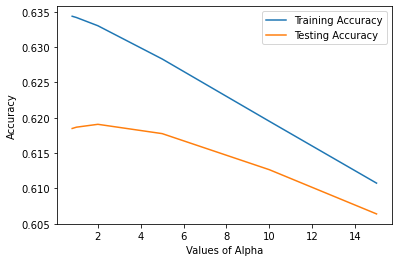

In [2030]:
alpha_plot(alpha_values)

From the plot it shows that the training went above the testing in all the alpha-values. But it was closest at 15. let us use the alpha-value of 15

In [2031]:
train_ridge,test_ridge = modelling(Ridge(alpha=15))

In [2032]:

print("Train Accuracy:",train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.6347671035156275
Test Accuracy: 0.6171392819585484


Now lets predict

In [2033]:
#create an instance of the model
Ridge = Ridge()

In [2034]:
#calling the function to predict
# #fit the model
Ridge.fit(x_train_scaler,y_train)
#make predictions on the test data
ridge_pred = model_predict(Ridge)

### Performance Metrics for Ridge Regression

In [2035]:
print('Ridge Regression Coefficient: ',Ridge.coef_)
print('Ridge Regression bias: ',Ridge.intercept_)

Ridge Regression Coefficient:  [-1.54251671 20.36404776  9.19048675 -0.93572812 -0.87500823 -0.21948727
 -3.24904968 11.05817399 30.70728772 -8.51648746 52.07719627 -0.13999688
  0.91152886]
Ridge Regression bias:  -8.435006946758843


In [2036]:
# Mean Absolute Error on test
print('Ridge Regression mean absolute error: ',mean_absolute_error(y_test, ridge_pred))
# RMSE on test data
print('Ridge Regression mean squared error: ',np.sqrt(mean_squared_error(y_test, ridge_pred)**0.5))
# R2 Squared: on test
print('Ridge Regression R2 Score: ',r2_score(y_test, ridge_pred))


Ridge Regression mean absolute error:  3.6448964690805226
Ridge Regression mean squared error:  2.5532729274973365
Ridge Regression R2 Score:  0.6186555864400756


### Model Regularization using Lasso Regression

In [2037]:
#calling the function get the accuracy
train_lasso,test_lasso = modelling(Lasso())

In [2038]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(train_lasso))
print("Test Accuracy:{:.3f}".format(test_lasso))

Train Accuracy:0.237
Test Accuracy:0.233


In [2039]:
#regularize the model using different values of c
alpha_values = [0.1,0.2,0.3,0.4,0.5,0.8]
#function to regularize the model
def lr_reg2(alpha_values):
    train_accuracy,test_accuracy = [],[] #empty list to save the result
    for val in alpha_values:
        train_lasso,test_lasso = modelling(Lasso(alpha=val))
        
        train_accuracy.append(train_lasso)
        test_accuracy.append(test_lasso)
#return the training and testing accuracy        
    return train_accuracy,test_accuracy 

In [2040]:
#calling the function
train_accuracy,test_accuracy = lr_reg2(alpha_values)
print("Train Accuracies:",train_accuracy)
print("Test Accuracies:", test_accuracy)

Train Accuracies: [0.587788412787807, 0.5054472558678302, 0.41003345282256987, 0.31506573819153727, 0.3056992297565323, 0.26511101723606334]
Test Accuracies: [0.588750726826378, 0.508752767771698, 0.4131607635281034, 0.311877408908364, 0.3019025942154061, 0.2609717554280553]


### Let us Visualise the Result

C:\Users\User\AppData\Local\Temp\ipykernel_22580\4266422504.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


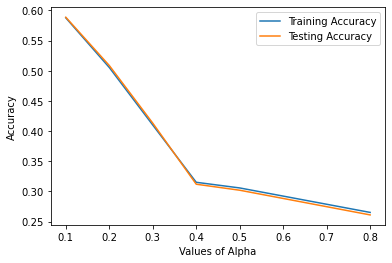

In [2041]:
#function to visualise the alpha values
alpha_plot(alpha_values)
 

This model generalised very well in all the alpha values, but it was closest at alpha of 0.1. Let us this value

In [2042]:
train_lasso,test_lasso = modelling(Lasso(alpha=0.1))

print("Train Accuracy:",train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.6347671035156275
Test Accuracy: 0.6171392819585484


Now let us predict

In [2043]:
#create an instance of the model
lasso = Lasso()

In [2044]:
#calling the function to predict
# #fit the model
lasso.fit(x_train_scaler,y_train)
#make predictions on the test data
lasso_pred = model_predict(lasso)

### Performance Metrics for Lasso Regression

In [2045]:
print('Lasso Regression Coefficient: ',lasso.coef_)
print('Lasso Regression bias: ',lasso.intercept_)

Lasso Regression Coefficient:  [-0.          0.          0.         -0.         -7.04042273 -0.
 -0.          0.          0.          0.          0.         -0.
 -0.        ]
Lasso Regression bias:  14.504190635277439


In [2046]:
# Mean Absolute Error on test
print('Lasso Regression mean absolute error: ',mean_absolute_error(y_test, lasso_pred))
# RMSE on test data
print('Lasso Regression mean squared error: ',np.sqrt(mean_squared_error(y_test, lasso_pred)**0.5))
# R2 Squared: on test
print('Lasso Regression R2 Score: ',r2_score(y_test, lasso_pred))


Lasso Regression mean absolute error:  5.344745578407873
Lasso Regression mean squared error:  3.0404972765682934
Lasso Regression R2 Score:  0.23315621524629127


### Model Comparison

In [2047]:
df = {'Models': ["Linear Regressor", "Ridge Regressor", "Lasso Regressor"],
        "Training Accuracy": [0.64, 0.63, 0.63],
        "Test Accuracy": [0.62, 0.62, 0.62],
        "Mean Absolute Error": [3.63, 3.64, 5.34],
        "Mean Squared Error": [2.56, 2.55, 3.04],
        "R2 Score": [0.62, 0.62, 0.23],
        }
model_comparison = pd.DataFrame(data = df)

# display the table of performance comparison
model_comparison

,Models,Training Accuracy,Test Accuracy,Mean Absolute Error,Mean Squared Error,R2 Score
0,Linear Regressor,0.64,0.62,3.63,2.56,0.62
1,Ridge Regressor,0.63,0.62,3.64,2.55,0.62
2,Lasso Regressor,0.63,0.62,5.34,3.04,0.23


Observation

R-squared is awesome, and both MAE and RMSE are fairly low too. These numbers indicate that the model is pretty good. 

The linear regressor model still had similar performance after regularization with Ridge and Lasso Regressors. Although Lasso regressor had a slightly different result

### Now, Let us use tree based regressor models

In [2048]:
#import the libraries
from sklearn import metrics
# from sklearn import model_selection
# from sklearn import preprocessing
# from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


In [2049]:
# define dataset
def Definedata():
    X = cars.drop(columns=['Price']).values
    y = cars['Price'].values
    return X, y

In [2050]:
#function to model the data
def Models(models):
    
    model = models
    X, y = Definedata() #calling a function within a function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    print('Mean Absolute  Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('R Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

In [2051]:
Acc = pd.DataFrame(index=None, columns=['model','Mean Absolute  Error','Mean Squared  Error','R Squared  Error','Accuracy on Training set','Accuracy on Testing set'])

### Calling the functions to define the data, build the model, and get feature importance

In [2052]:
#calling the function to define the data
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 25)

In [2053]:
#create an instance of the regressors
regressors = [('DecisionTreeRegressor',DecisionTreeRegressor()),
              ('GradientBoostingRegressor', GradientBoostingRegressor()),
              ('RandomForestRegressor', RandomForestRegressor()),             
              ('ExtraTreesRegressor',ExtraTreesRegressor())]           

In [2054]:
for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    
    print(pd.Series({'model':name,'Mean Absolute Error': MAE, 'Mean Squared  Error': MSE,'R Squared Score': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}))

model                      DecisionTreeRegressor
Mean Absolute Error                     3.245395
Mean Squared  Error                    44.936539
R Squared Score                         6.703472
Accuracy on Traing set                  0.999981
Accuracy on Testing set                 0.551027
dtype: object
model                      GradientBoostingRegressor
Mean Absolute Error                         2.598151
Mean Squared  Error                        22.545431
R Squared Score                             4.748203
Accuracy on Traing set                      0.869968
Accuracy on Testing set                     0.774743
dtype: object
model                      RandomForestRegressor
Mean Absolute Error                     2.512499
Mean Squared  Error                    22.300914
R Squared Score                         4.722384
Accuracy on Traing set                  0.962175
Accuracy on Testing set                 0.777186
dtype: object
model                      ExtraTreesRegressor
Mean 

In terms of the mean squared error, Gradient boosting performed better than the other models. Also gradient boosting model is the only model that did not overfit, in otherwords it generalised well. 

Now let us tune the models for better perfromance

### Model Tuning

In [2055]:
#create an instance of the regressors
regressors2 = [('DecisionTreeRegressor',DecisionTreeRegressor(max_depth=4,min_samples_leaf=1,max_features='sqrt',random_state=0)),
              ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=21,learning_rate=0.01,max_depth=4, n_estimators=3000,alpha=0.1)),
              ('RandomForestRegressor', RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=4)),             
              ('ExtraTreesRegressor',ExtraTreesRegressor(max_depth=4,min_samples_leaf=1,max_features='sqrt',random_state=0))]           

In [2056]:
Acc2 = pd.DataFrame(index=None, columns=['model','Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

In [2057]:
for mod in regressors2:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    
    print(pd.Series({'model':name,'Mean Absolute Error': MAE, 'Mean Squared  Error': MSE,'R Squared Score': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}))

model                      DecisionTreeRegressor
Mean Absolute Error                     3.948345
Mean Squared  Error                    40.986758
R Squared Score                          6.40209
Accuracy on Traing set                  0.607048
Accuracy on Testing set                  0.59049
dtype: object
model                      GradientBoostingRegressor
Mean Absolute Error                          2.49887
Mean Squared  Error                        22.782417
R Squared Score                             4.773093
Accuracy on Traing set                      0.939413
Accuracy on Testing set                     0.772375
dtype: object
model                      RandomForestRegressor
Mean Absolute Error                     3.362211
Mean Squared  Error                    29.750517
R Squared Score                         5.454403
Accuracy on Traing set                  0.716217
Accuracy on Testing set                 0.702755
dtype: object
model                      ExtraTreesRegressor
Mean 

### Model Comparison for Tree based Regressors

In [2058]:
df2 = {'Models': ["Decision Tree Regressor", "Gradient Boosting Regressor", "Random Forest Regressor", "Extra Tree Regressor"],
        "Training Accuracy": [0.61, 0.94, 0.71, 0.57],
        "Test Accuracy": [0.59, 0.77, 0.70, 0.55],
        "Mean Absolute Error": [3.95, 2.50, 3.39, 4.14],
        "Mean Squared Error": [40.99, 22.98, 29.96, 45.44],
        "R2 Score": [6.40, 4.79, 5.47,6.74]
        }
model_comparison2 = pd.DataFrame(data = df2)

# display the table of performance comparison
model_comparison2

,Models,Training Accuracy,Test Accuracy,Mean Absolute Error,Mean Squared Error,R2 Score
0,Decision Tree Regressor,0.61,0.59,3.95,40.99,6.40
1,Gradient Boosting Regressor,0.94,0.77,2.50,22.98,4.79
2,Random Forest Regressor,0.71,0.70,3.39,29.96,5.47
3,Extra Tree Regressor,0.57,0.55,4.14,45.44,6.74


We had to perform hyperparameter tuning on the different models

For the Decision Tree model, we set a max depth of 4, min_samples_leaf of 1,max_features was sqrt and set a random seed for reproducibility

For the Gradient Boosting Model, we set learning rate of 0.01,n_estimators of 1000,max_depth of 4, alpha value of 0.1 and also set a random seed for reproducibilty

For Random Forest model, we set a max depth of 4, n_estimators of 1000,min_samples_leaf of 1, min_samples_split of 2 and min_features as sqrt.

For the ExtraTrees Regressor model, we set a max depth of 4, min_samples_leaf of 1,max_features was sqrt and set a random seed for reproducibility

After tuning, the models performed better. The Gradient boosting model had a lower Mean square error, Mean Absolute error and R squared score. But in terms of the accuracy, all the models overfits.

Conclusively, the Gradient Boosting model performed better than the other models before tuning and after tuning. This is because the smaller the errors, the closer you are to finding the line of best fit

### FEATURE IMPORTANCE PLOT

In [2064]:
#function to get feature importance
def Featureimportances(models,titles):
    model = models
    model.fit(X_train,y_train)
    plt.plot(model.feature_importances_,linestyle='dashdot', linewidth='1', color='blue')
    plt.xticks(range(cars.shape[1]),cars,rotation=60)
    plt.title(titles)
    plt.show();

In [2065]:
#create an instance of the models
d_tree = DecisionTreeRegressor(max_depth=4,min_samples_leaf=1,max_features='sqrt',random_state=0)
gbr = GradientBoostingRegressor(random_state=21,learning_rate=0.01,max_depth=4, n_estimators=3000,alpha=0.1)
rf = RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=4)           
xtree = ExtraTreesRegressor(max_depth=4,min_samples_leaf=1,max_features='sqrt',random_state=0)         

C:\Users\User\AppData\Local\Temp\ipykernel_22580\2391988871.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\User\AppData\Local\Temp\ipykernel_22580\2391988871.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\User\AppData\Local\Temp\ipykernel_22580\2391988871.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\User\AppData\Local\Temp\ipykernel_22580\2391988871.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


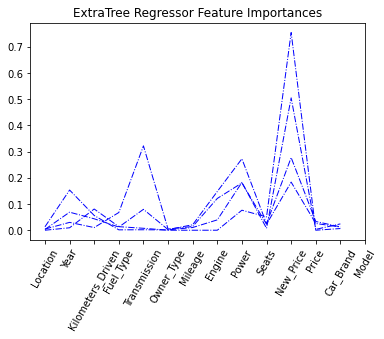

In [2063]:
#calling the fucntion for feature importance
Featureimportances(models= d_tree,titles='Decision Tree Regressor Feature Importances')
Featureimportances(models= gbr,titles='Gradient Boosting Regressor Feature Importances')
Featureimportances(models= rf,titles='Random Forest Regressor Feature Importances')
Featureimportances(models= xtree,titles='ExtraTree Regressor Feature Importances')

From the feature importance of the Decision Tree Regressor, it shows that our most important feature is New Price followed by the Power

From the feature importance of the Gradient Boost Regressor, it shows that our most important feature is New Price followed by Power

From the feature importance of the Random Forest Regressor, it shows that our most important feature is New Price followed by Power

From the feature importance of the ExtraTree Regressor, it shows that our most important feature is Transmission followed by the New Price



Conclusively, it can be said that the price of new cars is a huge factor in determining the price of used cars. Then closely followed by the Power

## Conclusion

After visualizing,analysing, and building a model to predict the price of the used cars, we can say that:



Diesel cars are the most number of car for sale and have high price too, followed by petrol cars

There are more manual cars for sale but automatic cars have highest price

Maruti, Hyundai and Honda car Brands are in top 3 cars for sale

Less driven cars have high price

First Owner type cars are the most number of cars for sale and they have the highest price too

Mileage and Kilometers driven has a negative correlation with the price of cars, in other words the price decreases as these features increase

Engine, Power and Seats has a positive correlation with the price of cars, in other words the price increases as these features increase

Cultus VXR,Alto and Corolla GLI car model are top 3 car model for sale

Most of the cars were registered for sale in the year between 2009-2018

Price of Cars amanufactured between 2009 and 2016 went up the most, with 2015 being the peak

Price of new cars is the top determining factor to consider when fixing the price for used cars

Linear Regression Model would be recommended to predict the price of used cars as it has a better performance than the tree based models

Gradient Boosting Regressor is the best performing tree based model